In [1]:
import pandas as pd
import pandas_datareader as dr
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\HIT-2233\Anaconda3\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [6]:
#Wikipeda에서 S&P500에 포함된 회사들의 리스트를 가져온다
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].tolist()  #TICKER명만 리스트로 만든다.
security = data_table[0]['Security'].tolist() #Ticker명에 해당하는 회사 전체 이름을 리스트로 가져온다 (이해를 돕기 위한 작업이므로 건너뛰어도 무방하다)
sector = data_table[0]['GICS Sector'].tolist()

tickers = tickers[0:60] #이해를 돕기위해 적은 양의 데이터만 사용하도록 하겠다.
security = security[0:60]
sector = sector[0:60]

prices_list = []

In [8]:
#리스트 길이가 같은지 확인한다. equal 함수를 사용해도 되지만, 데이터가 복잡하지 않기 때문에 가장 간단한 방법을 사용했다.
print(len(tickers))
print(len(security))
print(len(sector)) 

60
60
60


In [9]:
#데이터 불러오기. 2017년1월1일 부터 2020년 2월 28일까지의 데이터를 가져온다.
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,160.878021,36.556423,52.551662,112.360001,109.816139,35.706703,103.480003,11.43,168.627762,10.091925,...,41.276485,97.059998,47.991409,87.063789,35.289848,69.122673,76.180000,96.003609,791.460022,157.297501
2017-01-04,161.121964,36.846622,53.292667,115.739998,110.080170,36.408356,104.139999,11.43,170.011581,10.005373,...,41.205002,101.730003,48.597729,87.961052,35.084770,69.512108,77.519997,96.152031,793.039978,157.947693
2017-01-05,160.570786,37.164909,53.696846,114.809998,108.430000,36.973591,105.910004,11.24,169.892990,9.875546,...,40.901161,101.940002,48.707962,87.998062,34.986332,69.169022,76.930000,95.576912,792.000000,158.909500
2017-01-06,161.040649,38.175949,53.713688,115.419998,109.665268,36.944351,108.300003,11.32,167.668976,10.230409,...,39.962864,101.279999,48.818207,88.784348,34.289265,68.770332,79.300003,95.641861,792.909973,160.307739
2017-01-09,160.173203,38.138512,54.067345,117.110001,108.439430,36.739704,108.570000,11.49,167.570175,9.979407,...,39.989666,99.519997,48.138390,87.054535,33.857735,67.880234,79.589996,95.048210,790.340027,157.831848


## 수익률 변화의 정도를 계산하고, 전치를 사용해 ticker명을 Index로 사용한다.

In [10]:
df = prices_df.pct_change().iloc[1:].T

In [11]:
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-29,2020-06-30,2020-07-01,2020-07-02
MMM,0.001516,-0.003421,0.002926,-0.005387,-0.003892,0.007419,-0.002530,-0.000282,-0.000733,0.006939,...,-0.006658,-0.009232,0.007339,-0.035606,0.016095,-0.013901,0.019997,0.002700,-0.003590,0.010358
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001340,-0.008763,0.005157,-0.000733,-0.003423,...,0.004431,-0.003749,0.010627,-0.043812,0.026575,-0.010154,0.003382,0.027188,0.002297,0.006438
ABBV,0.014101,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.004988,0.005790,0.000411,-0.022300,0.019445,-0.008867,0.003225,0.018042,0.009778,-0.002623
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,0.014722,-0.009452,-0.008168,-0.043234,0.000372,-0.010259,0.003970,0.005578,0.056549,0.033775
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002928,0.010105,-0.007866,-0.000690,...,-0.006800,0.005210,0.023692,-0.026808,0.076694,-0.022317,0.001177,0.009402,-0.000605,0.005266


In [12]:
len(df)

60

In [13]:
test1 = df.index.to_list()

In [14]:
test1 == tickers

True

In [15]:
test2 = []
for i in tickers:
    if i not in test1:
        test2.append(i)
print(test2)

[]


In [307]:
# 만약에 test2에 종목이 나오면 해당 종목을 제거한다.
# tickers.remove('BRK.B')
# tickers.remove('BF.B')
# security.remove('Berkshire Hathaway')
# security.remove('Brown-Forman Corp.')

In [16]:
len(tickers)

60

In [17]:
len(security)

60

In [18]:
#회사명 리스트와 값의 리스트를 저장한다.
companies = list(df.index)
companies
movements = df.values
movements

array([[ 0.00151632, -0.00342087,  0.00292621, ...,  0.00269974,
        -0.00359006,  0.01035837],
       [ 0.00793839,  0.00863816,  0.02720415, ...,  0.02718794,
         0.00229683,  0.00643828],
       [ 0.0141005 ,  0.00758413,  0.00031365, ...,  0.01804228,
         0.00977795, -0.00262258],
       ...,
       [ 0.00154601, -0.00598135,  0.00067955, ...,  0.01714711,
         0.00147761,  0.00959019],
       [ 0.00199626, -0.00131138,  0.00114896, ...,  0.00017727,
         0.00209196,  0.01635588],
       [ 0.00413352,  0.0060894 ,  0.00879897, ...,  0.01071895,
         0.02851787,  0.00546995]])

## 데이터 정규화

In [19]:
normalize = Normalizer()
array_norm = normalize.fit_transform(df)
df_norm = pd.DataFrame(array_norm, columns=df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-29,2020-06-30,2020-07-01,2020-07-02
MMM,0.003034,-0.006846,0.005856,-0.010780,-0.007789,0.014846,-0.005062,-0.000564,-0.001467,0.013886,...,-0.013324,-0.018475,0.014688,-0.071255,0.032210,-0.027818,0.040019,0.005403,-0.007184,0.020729
ABT,0.016464,0.017916,0.056422,-0.002034,0.028000,0.002780,-0.018175,0.010696,-0.001520,-0.007099,...,0.009189,-0.007776,0.022040,-0.090866,0.055117,-0.021060,0.007014,0.056388,0.004764,0.013353
ABBV,0.024886,0.013386,0.000554,0.011621,-0.003848,-0.063719,0.004041,0.020449,-0.003702,-0.005706,...,0.008804,0.010220,0.000726,-0.039358,0.034319,-0.015650,0.005692,0.031843,0.017257,-0.004629
ABMD,0.036401,-0.009723,0.006429,0.017718,-0.050320,-0.010458,0.011962,0.035536,-0.017261,-0.007959,...,0.017815,-0.011437,-0.009883,-0.052315,0.000451,-0.012413,0.004804,0.006750,0.068427,0.040869
ACN,0.004869,-0.030357,0.023070,-0.022636,0.001056,0.018656,-0.005930,0.020464,-0.015930,-0.001396,...,-0.013771,0.010550,0.047978,-0.054288,0.155312,-0.045194,0.002383,0.019040,-0.001226,0.010664
ATVI,0.028711,0.022683,-0.001155,-0.008093,0.026354,0.031217,-0.002609,-0.006721,0.000000,0.004877,...,0.010957,-0.008776,0.006334,-0.016627,0.012179,0.003643,-0.017212,0.007741,0.041003,-0.009737
ADBE,0.010153,0.027055,0.035921,0.003968,-0.004545,0.010734,-0.005842,-0.000879,-0.007773,0.011644,...,0.028583,0.039534,0.006931,-0.032049,0.019433,-0.036539,-0.010142,0.041690,0.016455,0.011365
AMD,0.000000,-0.014866,0.006365,0.013431,-0.003892,-0.018762,-0.035134,-0.014961,-0.064242,0.005464,...,0.003144,0.008740,-0.012575,-0.026503,-0.007852,-0.031516,0.003213,0.041443,-0.000510,-0.004082
AAP,0.011393,-0.000968,-0.018174,-0.000818,0.003193,0.028679,0.008325,0.002546,-0.014218,0.007865,...,-0.026411,0.064195,-0.014927,-0.064524,-0.000874,-0.028367,0.027372,-0.002918,-0.004873,-0.001076
AES,-0.012879,-0.019485,0.053960,-0.036843,-0.026048,0.058317,-0.024241,0.018155,0.024344,0.002522,...,-0.011173,0.072043,-0.015038,0.000000,0.004340,-0.014065,0.064435,0.015708,-0.008291,0.007295


In [20]:
#누락된 데이터가 없는지 확인한다.
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask, col_mask]

Date


In [22]:
df

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-06-19,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-29,2020-06-30,2020-07-01,2020-07-02
MMM,0.001516,-0.003421,0.002926,-0.005387,-0.003892,0.007419,-0.002530,-0.000282,-0.000733,0.006939,...,-0.006658,-0.009232,0.007339,-0.035606,0.016095,-0.013901,0.019997,0.002700,-0.003590,0.010358
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001340,-0.008763,0.005157,-0.000733,-0.003423,...,0.004431,-0.003749,0.010627,-0.043812,0.026575,-0.010154,0.003382,0.027188,0.002297,0.006438
ABBV,0.014101,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.004988,0.005790,0.000411,-0.022300,0.019445,-0.008867,0.003225,0.018042,0.009778,-0.002623
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,0.014722,-0.009452,-0.008168,-0.043234,0.000372,-0.010259,0.003970,0.005578,0.056549,0.033775
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002928,0.010105,-0.007866,-0.000690,...,-0.006800,0.005210,0.023692,-0.026808,0.076694,-0.022317,0.001177,0.009402,-0.000605,0.005266
ATVI,0.019650,0.015525,-0.000791,-0.005539,0.018037,0.021365,-0.001786,-0.004600,0.000000,0.003338,...,0.007499,-0.006007,0.004335,-0.011380,0.008336,0.002493,-0.011780,0.005298,0.028063,-0.006664
ADBE,0.006378,0.016996,0.022566,0.002493,-0.002855,0.006743,-0.003670,-0.000553,-0.004883,0.007315,...,0.017957,0.024836,0.004354,-0.020134,0.012208,-0.022955,-0.006371,0.026190,0.010337,0.007139
AMD,0.000000,-0.016623,0.007117,0.015018,-0.004352,-0.020979,-0.039286,-0.016729,-0.071834,0.006110,...,0.003516,0.009773,-0.014061,-0.029635,-0.008780,-0.035240,0.003593,0.046341,-0.000570,-0.004565
AAP,0.008206,-0.000698,-0.013091,-0.000589,0.002300,0.020657,0.005997,0.001834,-0.010241,0.005665,...,-0.019024,0.046239,-0.010752,-0.046476,-0.000629,-0.020432,0.019716,-0.002102,-0.003510,-0.000775
AES,-0.008576,-0.012976,0.035933,-0.024535,-0.017346,0.038835,-0.016143,0.012090,0.016212,0.001680,...,-0.007440,0.047976,-0.010014,0.000000,0.002890,-0.009366,0.042909,0.010460,-0.005521,0.004858


In [24]:
final_df.shape

(60, 880)

In [25]:
# final_df = df.drop(['CTVA', 'DOW'])
# tickers.remove('CTVA')
# tickers.remove('DOW')
# security.remove('Corteva')
# security.remove('Dow Inc.')

In [26]:
len(tickers)

60

## 본격적인 클러스터링

In [27]:
num_of_clusters = range(2,8)
error = []
for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)    
table=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

table

,Cluster_Numbers,Error_Term
0,2,0.296983
1,3,0.270184
2,4,0.260755
3,5,0.248856
4,6,0.240466
5,7,0.231689


In [28]:
from sklearn import metrics

## 엘보우 방법으로 최적의 클러스터링 갯수를 찾아보자

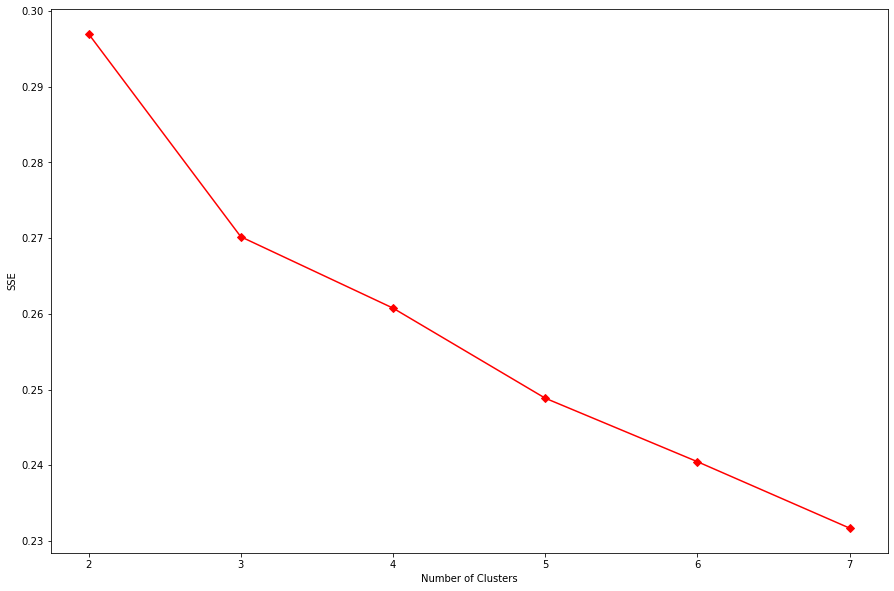

In [29]:
plt.figure(figsize=(15,10))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

## 5개의 클러스터를 만든다.

In [30]:
clusters = KMeans(6)
clusters.fit(final_df)
clusters.labels_

array([5, 5, 5, 0, 5, 0, 0, 0, 2, 1, 1, 5, 5, 4, 1, 5, 3, 0, 5, 5, 1, 3,
       1, 0, 0, 1, 0, 5, 3, 1, 3, 1, 1, 3, 3, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 1, 3, 0, 5, 1, 1, 0, 1, 1, 1, 3, 0, 5, 2, 3])

In [31]:
labels = clusters.predict(movements)
labels

array([5, 5, 5, 0, 5, 0, 0, 0, 2, 1, 1, 5, 5, 4, 1, 5, 5, 0, 5, 5, 1, 3,
       1, 0, 0, 1, 0, 5, 3, 1, 3, 1, 1, 3, 3, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 1, 3, 0, 5, 1, 1, 0, 1, 1, 1, 3, 0, 5, 2, 3])

In [36]:
print('labels : ',len(labels))
print('companies : ',len(companies))
print('security : ',len(security))
print('sector : ',len(sector))

labels :  60
companies :  60
security :  60
sector :  60


In [37]:
clustered_result = pd.DataFrame({'labels': labels, 'tickers': companies, 'full-name':security, 'sector':sector})
clustered_result.sort_values('labels')

,labels,tickers,full-name,sector
26,0,AMZN,Amazon.com Inc.,Consumer Discretionary
51,0,ANET,Arista Networks,Information Technology
23,0,GOOGL,Alphabet Inc. (Class A),Communication Services
24,0,GOOG,Alphabet Inc. (Class C),Communication Services
47,0,AAPL,Apple Inc.,Information Technology
7,0,AMD,Advanced Micro Devices Inc,Information Technology
17,0,ALXN,Alexion Pharmaceuticals,Health Care
5,0,ATVI,Activision Blizzard,Communication Services
3,0,ABMD,ABIOMED Inc,Health Care
56,0,ADSK,Autodesk Inc.,Information Technology


In [38]:
final_df['Cluster'] = clusters.labels_
final_df.head()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-29 00:00:00,2020-06-30 00:00:00,2020-07-01 00:00:00,2020-07-02 00:00:00,Cluster
MMM,0.003034,-0.006846,0.005856,-0.010780,-0.007789,0.014846,-0.005062,-0.000564,-0.001467,0.013886,...,-0.018475,0.014688,-0.071255,0.032210,-0.027818,0.040019,0.005403,-0.007184,0.020729,5
ABT,0.016464,0.017916,0.056422,-0.002034,0.028000,0.002780,-0.018175,0.010696,-0.001520,-0.007099,...,-0.007776,0.022040,-0.090866,0.055117,-0.021060,0.007014,0.056388,0.004764,0.013353,5
ABBV,0.024886,0.013386,0.000554,0.011621,-0.003848,-0.063719,0.004041,0.020449,-0.003702,-0.005706,...,0.010220,0.000726,-0.039358,0.034319,-0.015650,0.005692,0.031843,0.017257,-0.004629,5
ABMD,0.036401,-0.009723,0.006429,0.017718,-0.050320,-0.010458,0.011962,0.035536,-0.017261,-0.007959,...,-0.011437,-0.009883,-0.052315,0.000451,-0.012413,0.004804,0.006750,0.068427,0.040869,0
ACN,0.004869,-0.030357,0.023070,-0.022636,0.001056,0.018656,-0.005930,0.020464,-0.015930,-0.001396,...,0.010550,0.047978,-0.054288,0.155312,-0.045194,0.002383,0.019040,-0.001226,0.010664,5


In [39]:
final_df.tail()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00,2020-06-25 00:00:00,2020-06-26 00:00:00,2020-06-29 00:00:00,2020-06-30 00:00:00,2020-07-01 00:00:00,2020-07-02 00:00:00,Cluster
ATO,0.012305,-0.010780,-0.012589,-0.028269,0.002387,0.023840,0.012382,0.010259,-0.003501,0.014611,...,0.008761,-0.027923,0.002652,-0.041713,0.008775,0.020617,0.026641,0.024345,0.010629,3
ADSK,0.023798,-0.010297,0.041681,0.004948,0.006630,0.015055,-0.003681,0.011240,-0.044921,0.018757,...,0.017408,0.004156,-0.045804,0.005970,-0.009983,-0.003314,0.040909,0.011482,-0.006001,0
ADP,0.002876,-0.011126,0.001264,-0.011546,-0.004901,0.018201,0.010815,-0.000538,-0.012548,-0.002888,...,0.018477,0.000495,-0.070194,0.033520,-0.034440,0.021337,0.031896,0.002749,0.017839,5
AZO,0.003436,-0.002257,0.001977,-0.005578,0.007273,-0.003643,-0.003759,-0.022779,0.005473,-0.008778,...,0.013822,-0.007037,-0.052782,0.004834,0.002543,0.035808,0.000305,0.003600,0.028148,2
AVB,0.007881,0.011611,0.016777,-0.029449,-0.004303,-0.017793,0.015457,-0.003563,0.000541,0.002812,...,0.014015,-0.011228,-0.045916,0.022644,-0.024740,0.040861,0.020438,0.054376,0.010430,3


## Plot

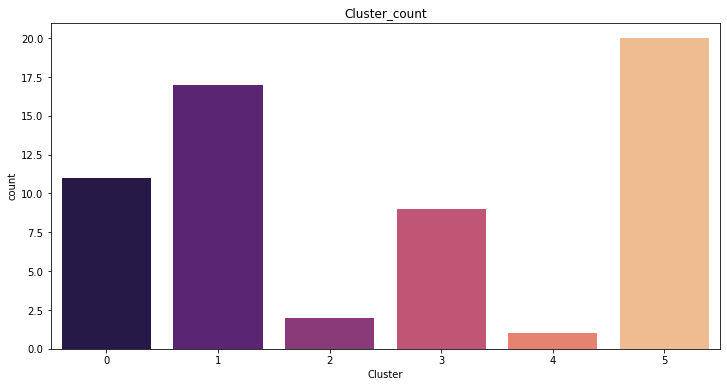

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')
plt.title('Cluster_count')
plt.show()
plt.savefig('cluster_count.png', dpi=300)